# Time for yoga or for your screen?

This dataset contains data on daily minutes of screen time between April 17th and May 14th 2019. It shows the the daily phone use in minutes when practicing yoga or not.
This dataset records the amount of time spent using different types of apps -- such as social media, reading, productivity and entertainment -- 
Dataset Taylor L Bailey

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10


# Import dataset

In [9]:
df = pd.read_csv('Screen Time Data.csv')

# Basic stats

In [10]:
# Basic stats
print("Number of rows : {}".format(df.shape[0]))
print()

print("Display of dataset: ")
display(df.head())
print()

print("Basics statistics: ")
data_desc = df.describe(include='all')
display(data_desc)
print()

print("Percentage of missing values: ")
display(100*df.isnull().sum()/df.shape[0])

print("data types: ")
df.dtypes


Number of rows : 28

Display of dataset: 


,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0



Basics statistics: 


,index,Date,Week Day,Total Screen Time,Social Networking,Reading and Reference,Other,Productivity,Health and Fitness,Entertainment,Creativity,Yoga
count,28.000000,28,28,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000,28.000000
unique,NaN,28,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,04/17/19,Wednesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,13.500000,NaN,NaN,113.250000,60.714286,8.714286,14.821429,9.071429,1.285714,1.821429,0.214286,0.571429
std,8.225975,NaN,NaN,43.562322,22.853571,9.340700,13.754605,6.097532,3.952094,6.188721,0.568112,0.503953
min,0.000000,NaN,NaN,52.000000,25.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,6.750000,NaN,NaN,83.500000,41.750000,2.000000,4.750000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,13.500000,NaN,NaN,111.000000,58.000000,5.000000,9.000000,8.000000,0.000000,0.000000,0.000000,1.000000
75%,20.250000,NaN,NaN,137.250000,76.500000,13.500000,21.500000,15.000000,0.000000,1.000000,0.000000,1.000000



Percentage of missing values: 


index                    0.0
Date                     0.0
Week Day                 0.0
Total Screen Time        0.0
Social Networking        0.0
Reading and Reference    0.0
Other                    0.0
Productivity             0.0
Health and Fitness       0.0
Entertainment            0.0
Creativity               0.0
Yoga                     0.0
dtype: float64

data types: 


index                     int64
Date                     object
Week Day                 object
Total Screen Time         int64
Social Networking         int64
Reading and Reference     int64
Other                     int64
Productivity              int64
Health and Fitness        int64
Entertainment             int64
Creativity                int64
Yoga                      int64
dtype: object

# Tune dataset for EDA

In [66]:
# rename columns to get rid of spaces:
df2 = df.rename(columns= {'Total Screen Time ': "Total_Screen_Time", 
                        'Social Networking': "Social_Networking", 
                        'Reading and Reference': "Reading_and_Reference",
                        'Health and Fitness': 'Health_and_Fitness'})
df2.head()

,index,Date,Week Day,Total_Screen_Time,Social_Networking,Reading_and_Reference,Other,Productivity,Health_and_Fitness,Entertainment,Creativity,Yoga
0,0,04/17/19,Wednesday,187,89,17,41,22,0,0,0,0
1,1,04/18/19,Thursday,123,78,17,8,9,0,0,0,0
2,2,04/19/19,Friday,112,52,40,8,4,0,3,0,0
3,3,04/20/19,Saturday,101,69,9,38,2,0,3,0,0
4,4,04/21/19,Sunday,56,35,2,43,3,0,1,1,0


In [78]:
dfmin = df2[df2["index"] == df2["index"].min()]
dfmin = dfmin.T
dfmin = dfmin.loc["Total_Screen_Time":,:]
dfmin = dfmin.loc[:"Creativity",:]
dfmin

,0
Total_Screen_Time,187
Social_Networking,89
Reading_and_Reference,17
Other,41
Productivity,22
Health_and_Fitness,0
Entertainment,0
Creativity,0


In [83]:
dfmax = df2[df2["index"] == df2["index"].max()]
dfmax = dfmax.T
dfmax = dfmax.loc["Total_Screen_Time":,:]
dfmax = dfmax.loc[:"Creativity",:]
dfmax

,27
Total_Screen_Time,88
Social_Networking,41
Reading_and_Reference,2
Other,7
Productivity,15
Health_and_Fitness,0
Entertainment,0
Creativity,0


# Data Visualization

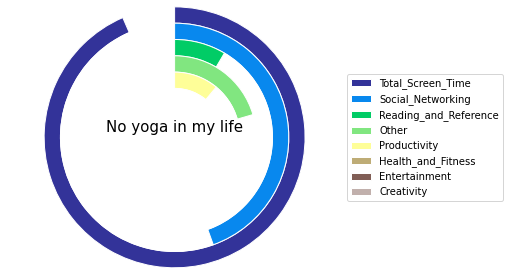

In [98]:

labels = dfmin.index
data = dfmin[0]
#number of data points
n = len(data)
#find max value for full ring
k = 10 ** int(log10(max(data)))
m = k * (1 + max(data) // k)

#radius of donut chart
r = 1.5
#calculate width of each ring
w = r / n 

#create colors along a chosen colormap
colors = [cm.terrain(i / n) for i in range(n)]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.title('No yoga in my life', x=0.5, y=0.5, size = 15)
plt.legend()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

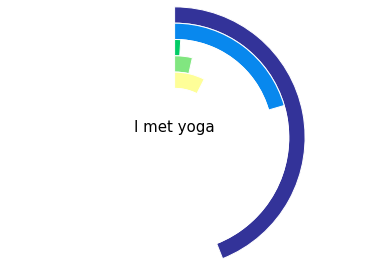

In [104]:
labels = dfmax.index
data = dfmax[27]

#create figure, axis
fig, ax = plt.subplots()
ax.axis("equal")

#create rings of donut chart
for i in range(n):
    #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
    innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
    plt.setp(innerring, width = w, edgecolor = "white")

plt.title('I met yoga', x=0.5, y=0.5, size = 15)

plt.show()

# Conclusion

the longer time spent doing yoga, the less time spent on your screen...
.. Faites du yoga, vous vous lâcherez la pomme!